<h1>Árvores de Decisão

<h3>Ajustando a largura do meu jupyter notebook

In [1]:
from IPython.core.display import display, HTML 
display(HTML("<style>.container {width:90% !important;}</style>"))

<h3>Importando as bibliotecas

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.tree import export_graphviz

<h3>Carregando o dataset

In [3]:
credito = pd.read_csv(r'C:\Users\Henrique.HENRIQUE\Desktop\Udemy\Formação Cientista de Dados\Machine Learning\Dados\Credit.csv')

<h3>Segregando as variáveis entre previsoras e classe

In [4]:
previsoras = credito.iloc[:, 0:20].values
classe = credito.iloc[:, 20].values

<h3>Realizando as transformações

In [5]:
labelencoder = LabelEncoder()

In [6]:
previsoras[:, 0] = labelencoder.fit_transform(previsoras[:, 0])
previsoras[:, 2] = labelencoder.fit_transform(previsoras[:, 2])
previsoras[:, 3] = labelencoder.fit_transform(previsoras[:, 3])
previsoras[:, 5] = labelencoder.fit_transform(previsoras[:, 5])
previsoras[:, 6] = labelencoder.fit_transform(previsoras[:, 6])
previsoras[:, 8] = labelencoder.fit_transform(previsoras[:, 8])
previsoras[:, 9] = labelencoder.fit_transform(previsoras[:, 9])
previsoras[:, 11] = labelencoder.fit_transform(previsoras[:, 11])
previsoras[:, 13] = labelencoder.fit_transform(previsoras[:, 13])
previsoras[:, 14] = labelencoder.fit_transform(previsoras[:, 14])
previsoras[:, 16] = labelencoder.fit_transform(previsoras[:, 16])
previsoras[:, 18] = labelencoder.fit_transform(previsoras[:, 18])
previsoras[:, 19] = labelencoder.fit_transform(previsoras[:, 19])

<h3>Separando dados de treino e teste

In [7]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsoras, classe, test_size=0.3, random_state=0)

<h3>Criado o objeto arvore de decisão

In [8]:
arvore = DecisionTreeClassifier()

In [9]:
#Neste momento existe o aprendizado
arvore.fit(X_treinamento, y_treinamento)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

<h3>É possível visualizar a árvore utilizando o pacote graphviz. Instalar o mesmo utilizando o pip. O graphviz é uma ferramenta específica para visualização de grafos

In [10]:
import graphviz
from sklearn.tree import export_graphviz

In [15]:
export_graphviz(arvore, out_file = 'tree.dot')

<h3>Para visualizar o grafo é necessário fazer o procedimento abaixo

In [17]:
#Entrar no site http://www.webgraphviz.com/ e colar o código gerado no arquivo salvo tree.dot

<h3>Inicio as minhas previsões

In [24]:
previsoes = arvore.predict(X_teste)
previsoes

array(['bad', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'good',
       'good', 'bad', 'bad', 'good', 'bad', 'good', 'good', 'good', 'bad',
       'good', 'bad', 'good', 'bad', 'good', 'bad', 'bad', 'bad', 'good',
       'bad', 'good', 'good', 'bad', 'good', 'good', 'bad', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'bad', 'good', 'good', 'bad', 'bad',
       'good', 'good', 'bad', 'good', 'good', 'good', 'bad', 'bad',
       'good', 'good', 'good', 'good', 'bad', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'bad', 'good', 'good', 'bad',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'good', 'good', 'good', 'bad', 'bad', 'good',
       'good', 'good', 'good', 'good', 'good', 'bad', 'good', 'good',
       'good', 'good', 'good', 'good', 'bad', 'bad', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'bad', 'good',

<h3>Agora já tenho minhas previsões. Preciso comparar as previsões com dataset y_teste onde são encontradas as repostas corretas. Assim, consigo verificar a acurácia das minhas previsões.

In [31]:
#Matrix de confusão
confusao = confusion_matrix(y_teste, previsoes)
confusao

array([[ 45,  41],
       [ 51, 163]], dtype=int64)

<h4>Visualizar a matrix de confusão utilizando o pacote yellowbrick

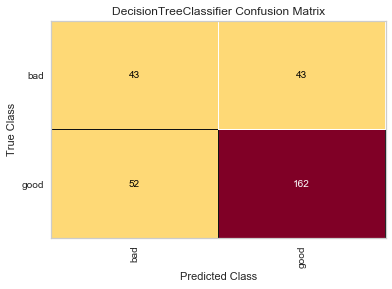

In [34]:
from yellowbrick.classifier import ConfusionMatrix

#Crio o objeto v de visualização
v = ConfusionMatrix(DecisionTreeClassifier())
v.fit(X_treinamento, y_treinamento)
v.score(X_teste, y_teste)
v.poof()

<h3>Verificando as taxas de acerto e erro encontradas

In [27]:
taxadeacerto = accuracy_score(y_teste, previsoes)
taxadeacerto

0.6933333333333334

In [29]:
taxadeerro = 1 - taxadeacerto
taxadeerro

0.30666666666666664

In [32]:
#É possível verificar que tive uma taxa de acerto menor quando comparado com a taxa de acerto encontrado pelo algortimo GaussianNB (NaiveBayes)